In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels as s
import matplotlib.pyplot as plt
import missingno as msno

from scipy import optimize
from scipy.stats import chi2
from scipy.stats import ttest_ind
from itertools import product
from sympy import E, Symbol
from rdatasets import data
from scipy.stats import expon
from sklearn import metrics
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.power import TTestIndPower

%matplotlib inline

# 1 Binary Regression

## (a) Exploration

### (i) 

#### ${1}$

#### The response RainTomorrow must be modified before we can fit the logistic model. Why?

The response in our regression model should be numeric for it to be estimated and predicted.

In [2]:
#import the dataset

weather = pd.read_csv('weatherAUS.csv')

weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#the response must be modified due to their types are 'Object'

print(weather.RainTomorrow.dtypes)
print(weather.RainToday.dtypes)

object
object


In [4]:
#lets covert Yes and No in both columns to numeric (1, 0)

weather["RainTomorrow2"] = 1 * (weather.RainTomorrow == "Yes")

In [5]:
weather["RainToday2"] = 1 * (weather.RainToday == "Yes")

In [6]:
#let's see the result

weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow2,RainToday2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,1,0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No,0,1


### (i) 

#### ${2}$

####  There are many NA values in the data set, but we cannot use these. Remove every row containing NAs from the data set.

In [7]:
# Reset index after drop

weather=weather.dropna(axis=0).reset_index(drop=True)

<AxesSubplot:>

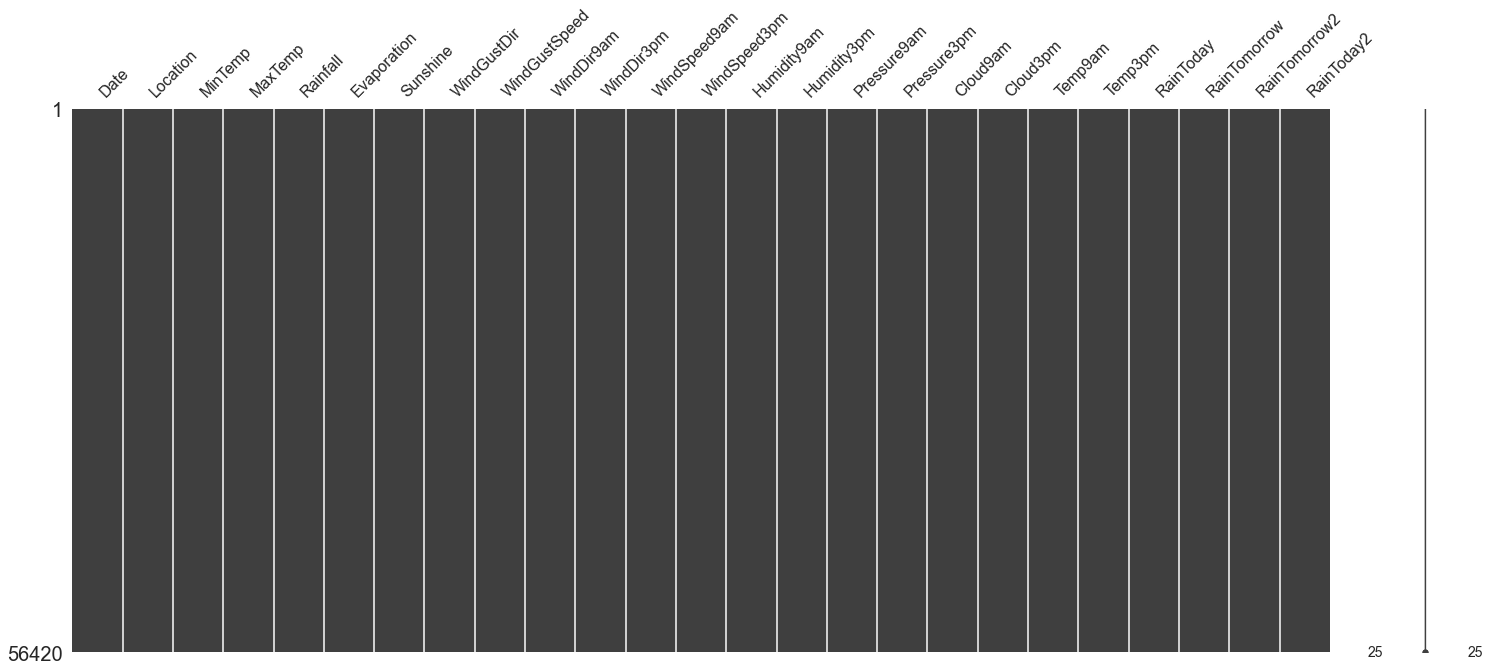

In [8]:
#using msno to check if we have dropped all the rows containing

sns.set(style = 'ticks') 

msno.matrix(weather)

### (ii) 

#### ${1}$ How many unique values are there in the Date column?

3416

#### ${2}$ How many unique values are there in the Location column?

26

#### ${3}$ It’s not possible to fit RainTomorrow ~ Date * Location. Why?

It is not possible to fit ${"RainTomorrow ~ Date * Location"}$ because for following reasons:

- Date is not really relavent


- The Date and Location cardinality are high and it can create collinearity or other issues

In [9]:
weather.Date.nunique()

3416

In [10]:
weather.Location.nunique()

26

#### ${4}$ We won’t be using Date anymore, so remove Date from the weather data.

In [11]:
weather = weather.drop('Date', axis=1)

In [12]:
weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow2,RainToday2
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0,0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0,0
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0,0
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0,0
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,0,0
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,0,0
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,0,0
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,0,0


### (iii) 

#### What are the unique locations in the data set? Display each unique location along with how many times it appears in the data set.

In [13]:
weather.Location.value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

### (iii) 

#### ${1}$ List all the possible wind directions.

In [14]:
weather.WindGustDir.value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

### (iii) 

#### ${2}$ What are the wind direction covariaties? Do all of them have the same set of possible wind directions?

As we can see the Wind Covariates are not the same at all.

In [15]:
weather.WindGustDir == weather.WindDir9am

0        False
1        False
2         True
3         True
4        False
         ...  
56415    False
56416    False
56417     True
56418    False
56419     True
Length: 56420, dtype: bool

In [16]:
weather.WindGustDir == weather.WindDir3pm

0        False
1        False
2        False
3        False
4         True
         ...  
56415    False
56416    False
56417    False
56418    False
56419    False
Length: 56420, dtype: bool

### (iii) 

#### ${3}$ How many parameters are fitted in the model "RainTomorrow ~ WindGustDir"?

There are 16 parameters fitted in the model.

In [17]:
fit = smf.ols("RainTomorrow2 ~ C(WindGustDir)", data = weather).fit()

fit.params.count()

16

## (b) Location

### (i) 

#### ${1}$ What is the probability of rain tomorrow in AliceSprings? 0.08412055780476839

the probability in calculation is calculated as follows:

# ${p=}\frac{e^{ \beta X^ {T}}}{1 + {e^{ \beta X^ {T}}}}$

In [18]:
model = smf.logit("RainTomorrow2 ~ Location - 1", data=weather).fit()
probp= model.params 
alicesprings = probp[0]

Optimization terminated successfully.
         Current function value: 0.511888
         Iterations 6


to predict AliceSpring probability: 

# ${p=}\frac{e^{ \beta[AliceSprings]}}{1 + {e^{ \beta [AliceSprings]}}} {=} \frac{e^{ -2.387633760815826}}{1 + {e^{ \beta -2.387633760815826}}}$

In [19]:
( np.e**(alicesprings) ) / ( 1 + (np.e**(alicesprings)))

0.08412055780476839

### (i) 

#### ${2}$ Which location has the smallest probability of rain? And what is the probability? 

In [20]:
my_params = probp.to_list()

def prob(x):
    
    for i in x:
        
        probability = ( np.e**(i) ) / ( 1 + (np.e**(i)))
        
        print(probability)
        
#using function we can get the probability 

In [21]:
#and now using it to fit into my table

probability = [0.08412055780476839,0.21740602776837123,0.30728314238952537,0.20315398886827452,0.11797752808988769,0.31231884057971016,0.25767472240365774,0.2413615265600825,0.24815595363540557,0.2171389552748379,0.11141094834232851,0.13486670151594352,0.2969574036511156,0.30154220779220775,0.19372509960159362,0.20363636363636367,0.1898386543082732,0.4004294149221686,0.21394517282479142,0.2461538461538462,0.24912891986062716,0.16287722199255877,0.17673841059602646,0.2505494505494505,0.2671118530884808,0.07439446366782018]

probabi = pd.DataFrame(probability, columns =['Probability'], dtype = float)

In [22]:
modell = smf.logit("RainTomorrow2 ~ Location - 1", data=weather).fit()

table = modell.conf_int()

table.reindex(table.abs().index).reset_index()

table.columns = ["Conf_0.025", "Conf_0.975"]

table['Probability'] = probabi.iloc[:,0].values

Optimization terminated successfully.
         Current function value: 0.511888
         Iterations 6


In [23]:
table.sort_values(by=['Probability'], ascending=False)

,Conf_0.025,Conf_0.975,Probability
Location[Portland],-0.496350,-0.311002,0.400429
Location[CoffsHarbour],-0.903146,-0.675455,0.312319
Location[Cairns],-0.898783,-0.726921,0.307283
Location[NorfolkIsland],-0.926001,-0.753928,0.301542
Location[MountGambier],-0.948226,-0.775431,0.296957
Location[Williamtown],-1.137309,-0.881342,0.267112
Location[Darwin],-1.139076,-0.977103,0.257675
Location[Watsonia],-1.182250,-1.009118,0.250549
Location[SydneyAirport],-1.187852,-1.018675,0.249129
Location[Melbourne],-1.212625,-1.004318,0.248156


Thus,

- Location[Woomera]	has the smallest probability of rain tomorrow.
- Its probability is 0.074394

### (i) 

#### ${3}$ Which location has the highest probability of rain? And what is the probability?

- Location[Portland] has the highest probability of rain tomorrow.
- Its probability is 0.400429

### (ii) 

#### ${1}$ Make a table that displays the probability of rain tomorrow for each location along with a confidence interval. Be sure to include AliceSprings!

In [24]:
table

,Conf_0.025,Conf_0.975,Probability
Location[AliceSprings],-2.537398,-2.237870,0.084121
Location[Brisbane],-1.368288,-1.193407,0.217406
Location[Cairns],-0.898783,-0.726921,0.307283
Location[Canberra],-1.515065,-1.218330,0.203154
Location[Cobar],-2.274652,-1.748795,0.117978
Location[CoffsHarbour],-0.903146,-0.675455,0.312319
Location[Darwin],-1.139076,-0.977103,0.257675
Location[Hobart],-1.249247,-1.041212,0.241362
Location[Melbourne],-1.212625,-1.004318,0.248156
Location[MelbourneAirport],-1.370255,-1.194581,0.217139


### (ii) 

#### ${2}$ Fit a model you can use to predict the probability of rain tomorrow from the probability of rain today, ignoring location. What’s the McFadden 𝑅2 of this model? (Display the 𝑅2 without using the summary method.)


In [25]:
newm = smf.glm(formula = "RainTomorrow2 ~ RainToday", 
              data=weather, 
              family=sm.families.Binomial()).fit()

In [26]:
def mcfaddenrsq(model):
    
    up = model.llf
    down = model.llnull
    
    
    if (1 - up / down) >= 0:
        
        return 1 - up / down
    
    else:
        
        return 'NULL'
    
mcfaddenrsq(newm)

0.0810013950327716

### (iii) 

#### Fit a model using both location and rain. Then fit a model with interactions between location and RainToday. Interpret and compare the parameters of the models. Which model do you prefer?


We can see here from the two generated models, one with interaction and one without:

- based on P-values we can first conclude that we can reject ${H_0}$ in which our covariates do have significant difference so our model is on the right direction.

- The one with interaction has higher $McFadden's{R^2}$

- In our Akaike information criterion $(AIC)$, the one with interaction also yield a lower score which indicated our likelihood distribution is a bit clower to our real distribution than the higher AIC model


In [27]:
#using RainToday and Location

new_rain_location = smf.glm(formula = "RainTomorrow2 ~ Location + Rainfall", 
              data=weather, 
              family=sm.families.Binomial()).fit()

In [28]:
#using RainToday and Location and 

new_rainlocation = smf.glm(formula = "RainTomorrow2 ~ Location * RainToday", 
              data=weather, 
              family=sm.families.Binomial()).fit()

In [29]:
print('Rain-Location Model Mc_R_squared: \n' 
      + str(mcfaddenrsq(new_rain_location)),
      'AIC: '
      + str(new_rain_location.aic),
      '\nRain-Location Interaction Model Mc_R_squared: \n' 
      + str(mcfaddenrsq(new_rainlocation)),
      'AIC: '
      + str(new_rainlocation.aic))

Rain-Location Model Mc_R_squared: 
0.07968747734323589 AIC: 54806.36441236664 
Rain-Location Interaction Model Mc_R_squared: 
0.10368071746579965 AIC: 53428.92906373999


In conculsion, I would choose the one witch Interaction Model.

## (c) Fitting

### (i)  

#### Make a function all_column that takes a data frame data and a response name name and outputs a formula including all column names in data on the right-hand side. For instance, if the data frame data contains the columns “Donald”, “Huey”, “Dewey”, and “Louie”, all_column(data, "Donald") should output "Donald ~ Huey + Dewey + Louie". Run all_columns(weather, "RainTomorrow") do demonstrate that it works.

In [30]:
def all_column(data, name): 
    
    coloum_list = data.columns.values.tolist()
    
    list = []
    
    for i in coloum_list:
        
        if name != i:
            
            list.append(i)
            
            covariate= str(list).replace(',',' + ').replace("""'""", "")
            
       
    print("""'"""+ name + ' ~ ' + covariate[1:-1] + """'""")

In [31]:
all_column(weather, 'Location')

'Location ~ MinTemp +  MaxTemp +  Rainfall +  Evaporation +  Sunshine +  WindGustDir +  WindGustSpeed +  WindDir9am +  WindDir3pm +  WindSpeed9am +  WindSpeed3pm +  Humidity9am +  Humidity3pm +  Pressure9am +  Pressure3pm +  Cloud9am +  Cloud3pm +  Temp9am +  Temp3pm +  RainToday +  RainTomorrow +  RainTomorrow2 +  RainToday2'


In [32]:
all_column(weather, 'Evaporation')

'Evaporation ~ Location +  MinTemp +  MaxTemp +  Rainfall +  Sunshine +  WindGustDir +  WindGustSpeed +  WindDir9am +  WindDir3pm +  WindSpeed9am +  WindSpeed3pm +  Humidity9am +  Humidity3pm +  Pressure9am +  Pressure3pm +  Cloud9am +  Cloud3pm +  Temp9am +  Temp3pm +  RainToday +  RainTomorrow +  RainTomorrow2 +  RainToday2'


In [33]:
all_column(weather, 'RainTomorrow2')

'RainTomorrow2 ~ Location +  MinTemp +  MaxTemp +  Rainfall +  Evaporation +  Sunshine +  WindGustDir +  WindGustSpeed +  WindDir9am +  WindDir3pm +  WindSpeed9am +  WindSpeed3pm +  Humidity9am +  Humidity3pm +  Pressure9am +  Pressure3pm +  Cloud9am +  Cloud3pm +  Temp9am +  Temp3pm +  RainToday +  RainTomorrow +  RainToday2'


### (ii)  

####  Fit a logistic model for RainTomorrow with all covariates. How many parameters was fitted in this model? (Don’t use summary for this! Use an argument or a method from statsmodels.)


In [34]:
smf.glm(formula = 'RainTomorrow2 ~ Location +  MinTemp +  MaxTemp +  Rainfall +  Evaporation +  Sunshine +  WindGustDir +  WindGustSpeed +  WindDir9am +  WindDir3pm +  WindSpeed9am +  WindSpeed3pm +  Humidity9am +  Humidity3pm +  Pressure9am +  Pressure3pm +  Cloud9am +  Cloud3pm +  Temp9am +  Temp3pm  +  RainToday2', 
              data=weather, 
              family=sm.families.Binomial()).fit().params.count()

88

### (iii)  

#### Fit at least five logistic regression models on this data set and choose your favorite. Make sure to justify your choice.

first I want to see their correlation with each other

In [35]:
cor= weather.corr()
#find their correlation values

cor *= np.tri(*cor.values.shape, k=-1).T
co = cor.stack()
co = co.reindex(co.abs().sort_values(ascending = False).index).reset_index()

co.head()

<ipython-input-35-5596e26e27d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= weather.corr()


,level_0,level_1,0
0,MaxTemp,Temp3pm,0.984841
1,Pressure9am,Pressure3pm,0.961538
2,MinTemp,Temp9am,0.906295
3,MaxTemp,Temp9am,0.893387
4,Temp9am,Temp3pm,0.870620


by looking at the covariance and based on our goal is to predict RainTomorrw, I choose

- Rainfall 

- RainToday

as my covariates and as we examine our first model we will start adjusting and thus generate at least five regression models.



In [36]:
model_01 = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall", 
              data=weather, 
              family=sm.families.Binomial()).fit()
model_01.summary()
model_01.aic

54240.58892271702

after model_01 here is what we have:

|Models         | R${^2}$       | AIC    | ${\Delta}$R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.08839       | 54240.5|           NULL|           NULL|


now I want to see if adding Pressure9am interaction with Pressure Humidity and Temp in 9am and 3pm combined with help elevate my model's significane in regression

In [37]:
model_02 = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + Temp9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
              data=weather, 
              family=sm.families.Binomial()).fit()
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56411
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20907.
Date:                Thu, 24 Nov 2022   Deviance:                       41815.
Time:                        18:51:23   Pearson chi2:                 5.85e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          105.0497      2.172     48.362      0.000     100.792     109.307
RainToday[T.Yes]     0.5846      0.034     17.318      0.000       0.518       0.651
Rainfall             0.0166      0.002      8.300      0.000       0.013       0.021
Humidity9am         -0.0054      0.001     -4.018      0.000      -0.008      -0.003
Temp9am              0.0035      0.008      0.455      0.649      -0.012       0.019
Pressure9am          0.1158      0.007     15.608      0.000       0.101       0.130
Humidity3pm          0.0648      0.002     42.150      0.000       0.062       0.068
Temp3pm             -0.0594      0.008     -7.332      0.000      -0.075      -0.043
Pressure3pm         -0.2231      0.008    -29.359      0.000      -0.238      -0.208
====================================================================================
"""

In [38]:
print(mcfaddenrsq(model_02))
print(model_02.aic)

0.29714888507669
41832.88290610995


after model_02 here is what we have:

|Models         | R${^2}$       | AIC    | ${\Delta}$R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.08839       | 54240.5|           NULL|           NULL|
| Model_02      | 0.29714       | 41832.8|    +0.20875   |      -124077.7|

we can see after including our new-added covariates, our covariates's ability to explain our response increaded to 29.7%

note that our p-value here for Temp9am, however, p = .649 in which can show it does not obtain statistical meaning because it is not sufficient to explain our response RainTomorrow now.

now i will remove Temp9am and add WindGustSpeed with interaction of pressure9am

In [39]:
model_03 = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + WindGustSpeed * Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
              data=weather, 
              family=sm.families.Binomial()).fit()

model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56410
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20056.
Date:                Thu, 24 Nov 2022   Deviance:                       40112.
Time:                        18:51:24   Pearson chi2:                 5.67e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    64.2253      6.092     10.542      0.000      52.284      76.166
RainToday[T.Yes]              0.4597      0.034     13.344      0.000       0.392       0.527
Rainfall                      0.0141      0.002      7.021      0.000       0.010       0.018
Humidity9am                   0.0046      0.001      4.186      0.000       0.002       0.007
WindGustSpeed                 0.0665      0.125      0.533      0.594      -0.178       0.311
Pressure9am                   0.1669      0.009     17.972      0.000       0.149       0.185
WindGustSpeed:Pressure9am -2.228e-05      0.000     -0.181      0.856      -0.000       0.000
Humidity3pm                   0.0700      0.001     69.575      0.000       0.068       0.072
Temp3pm                      -0.0276      0.003    -10.785      0.000      -0.033      -0.023
Pressure3pm                  -0.2375      0.007    -32.060      0.000      -0.252      -0.223
=============================================================================================
"""

In [40]:
print(mcfaddenrsq(model_03))
print(model_03.aic)

0.3257641136841579
40132.47053434698


after model_03 here is what we have:

|Models         | R${^2}$       | AIC    | ${\Delta}$R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.08839       | 54240.5|           NULL|           NULL|
| Model_02      | 0.29714       | 41832.8|    +0.20875   |      -124077.7|
| Model_03      | 0.32576       | 40132.4|    +0.02862   |        -1700.4|

we can see our model R${^2}$ increased to 32%! However, if we look at the p-values, ones that contain WindGustSpeed seems to be irrelevant to our response 

I will remove the covariate WindGustSpeed but I want to see if some interaction:

- Sunshine * Evaporation

In [41]:
model_04 = smf.glm(formula = "RainTomorrow2 ~ RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
              data=weather, 
              family=sm.families.Binomial()).fit()

model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56409
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19875.
Date:                Thu, 24 Nov 2022   Deviance:                       39749.
Time:                        18:51:25   Pearson chi2:                 5.24e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               98.8838      2.188     45.185      0.000      94.594     103.173
RainToday[T.Yes]         0.6096      0.035     17.540      0.000       0.541       0.678
Sunshine                -0.1310      0.007    -18.136      0.000      -0.145      -0.117
Evaporation              0.0899      0.009      9.967      0.000       0.072       0.108
Sunshine:Evaporation    -0.0104      0.001     -9.201      0.000      -0.013      -0.008
Rainfall                 0.0118      0.002      5.711      0.000       0.008       0.016
Humidity9am             -0.0100      0.001     -8.937      0.000      -0.012      -0.008
Pressure9am              0.1136      0.007     15.334      0.000       0.099       0.128
Humidity3pm              0.0515      0.001     50.213      0.000       0.049       0.053
Temp3pm                 -0.0288      0.003     -9.859      0.000      -0.035      -0.023
Pressure3pm             -0.2135      0.008    -27.971      0.000      -0.228      -0.199
========================================================================================
"""

In [42]:
print(mcfaddenrsq(model_04))
print(model_04.aic)

0.33187171923826264
39771.1093534951


after model_04 here is what we have:

|Models         | R${^2}$       | AIC    | ${\Delta}$R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.08839       | 54240.5|           NULL|           NULL|
| Model_02      | 0.29714       | 41832.8|    +0.20875   |      -124077.7|
| Model_03      | 0.32576       | 40132.4|    +0.02862   |        -1700.4|
| Model_04      | 0.33187       | 39771.1|    +0.00611   |       -361.3  |

This model is surprising entertaning! We can see the whole model covariates are even more significant for our response since the R${^2}$ is up to 33% now with p-values are all significant (${p<0.001}$) showing this increment of interaction has statistical meaning.

Lastly I wanna add one more block for my model which is Location:

In [43]:
model_05 = smf.glm(formula = "RainTomorrow2 ~ Location + RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
              data=weather, 
              family=sm.families.Binomial()).fit()
model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56384
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19622.
Date:                Thu, 24 Nov 2022   Deviance:                       39244.
Time:                        18:51:27   Pearson chi2:                 5.19e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      102.3792      2.328     43.986      0.000      97.817     106.941
Location[T.Brisbane]             0.3234      0.117      2.758      0.006       0.094       0.553
Location[T.Cairns]               0.0068      0.119      0.057      0.954      -0.227       0.241
Location[T.Canberra]             0.4171      0.144      2.903      0.004       0.135       0.699
Location[T.Cobar]                0.1734      0.209      0.828      0.408      -0.237       0.584
Location[T.CoffsHarbour]         0.4639      0.127      3.652      0.000       0.215       0.713
Location[T.Darwin]              -0.0305      0.120     -0.254      0.799      -0.266       0.205
Location[T.Hobart]               0.0529      0.127      0.416      0.678      -0.197       0.303
Location[T.Melbourne]            0.4154      0.124      3.350      0.001       0.172       0.658
Location[T.MelbourneAirport]     0.2535      0.120      2.113      0.035       0.018       0.489
Location[T.Mildura]              0.3618      0.131      2.752      0.006       0.104       0.619
Location[T.Moree]                0.4235      0.136      3.111      0.002       0.157       0.690
Location[T.MountGambier]         0.6842      0.121      5.652      0.000       0.447       0.921
Location[T.NorfolkIsland]        0.1789      0.119      1.502      0.133      -0.055       0.412
Location[T.Nuriootpa]            0.5484      0.129      4.253      0.000       0.296       0.801
Location[T.Perth]                0.7835      0.118      6.634      0.000       0.552       1.015
Location[T.PerthAirport]         0.8638      0.119      7.251      0.000       0.630       1.097
Location[T.Portland]             0.7440      0.124      6.020      0.000       0.502       0.986
Location[T.Sale]                 0.1480      0.129      1.144      0.253      -0.106       0.402
Location[T.Sydney]               0.5302      0.124      4.261      0.000       0.286       0.774
Location[T.SydneyAirport]        0.4288      0.117      3.678      0.000       0.200       0.657
Location[T.Townsville]          -0.5860      0.124     -4.713      0.000      -0.830      -0.342
Location[T.WaggaWagga]           0.5006      0.127      3.945      0.000       0.252       0.749
Location[T.Watsonia]             0.3669      0.120      3.052      0.002       0.131       0.602
Location[T.Williamtown]          0.5732      0.132      4.358      0.000       0.315       0.831
Location[T.Woomera]              0.2450      0.154      1.595      0.111      -0.056       0.546
RainToday[T.Yes]                 0.6151      0.035     17.459      0.000       0.546       0.684
Sunshine                        -0.1294      0.007    -17.508      0.000      -0.144      -0.115
Evaporation                      0.0947      0.009     10.277      0.000    

In [44]:
print(mcfaddenrsq(model_05))
print(model_05.aic)

0.3403692465315483
39315.56400937342


In total, with model_05 here is what we have:

|Models         | R${^2}$       | AIC    | ${\Delta}$R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.08839       | 54240.5|           NULL|           NULL|
| Model_02      | 0.29714       | 41832.8|    +0.20875   |      -124077.7|
| Model_03      | 0.32576       | 40132.4|    +0.02862   |        -1700.4|
| Model_04      | 0.33187       | 39771.1|    +0.00611   |       -361.3  |
| Model_05      | 0.34036       | 39315.5|    +0.00849   |       -455.6  |

In general, based on our stepwise regression modeling, it seems like we are on the right track considering our AIC score has showns a steady decline as our model significance R${^2}$ showing more and more ability of our covariates able to explain our response. 

- My favourite would be Model_04 since its p-value shown all of the covariates are able to reach significant level and it has higher R${^2}$ and lower ${AIC}$ to our previous models too. 

- Model_05 is however too a very good model since it has the highest R${^2}$ and lowest ${AIC}$ and even though our p-value in Location do not reach significant level, our main categorical block of covaiates all reached significant level.

### (iv) 

#### Investigate the effect of link functions on your choice of models. Using the same models as in your previous exercise, change the link function from the logistic link to the Probit link, Cauchit link, and cloglog link. Report the BICs of the models in a table.

To this question, I will use the built-in function .bic_llf to calculate my BIC socre but below is the funcation of calculation my BIC using equation based on followig:

${BIC = k*ln(n) - 2ln(L)}$ <br> where ${n = smaple \,number}$ and ${k = number \, of \,our \,covariates}$ and ${L = Loglikehood\, Function}$

In [45]:
#my bic function:
    
def bic(n,k,model):
    
    llf = model.llf # log-like value
    
    bic = ((-2)*(llf)) + (k)*(np.log(n)) # bic calculation
    
    print(bic)

In total, with all five models here is what we have for our calculation for BIC:



|Models         |     Logit   |   Probit  | Cauchy | Cloglog |
| :--- | :--- | :---: | :----: |----:|  
| Model_01      | 54267.4         | 54280.3       | 54244.2    | 54348.8     |
| Model_02      | 41913.3         | 42047.6       | 42350.1    | NA         |
| Model_03      | 40221.8         | 40306.3       | 41021.2    | NA         |
| Model_04      | 39869.4         | 39806.7       | 41115.4    | NA         |
| Model_05      | 39637.4         | 39556.2       | 40881.2    | NA         |





model_01:

In [46]:
model_01_logit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall", 
              data=weather, 
              family=sm.families.Binomial()).fit()

model_01_probit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

model_01_cauchy = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall", 
                           data=weather, 
                           family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

model_01_clog = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall", 
                        data=weather, 
                        family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()

model_02:

In [47]:
model_02_logit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + Temp9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                         data=weather, 
                         family=sm.families.Binomial()).fit()

model_02_probit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + Temp9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

model_02_cauchy = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + Temp9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

In [48]:
model_02_clog = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + Temp9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                        data=weather, 
                        family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


model_03:

In [50]:
model_03_logit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + WindGustSpeed * Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                         data=weather, 
                         family=sm.families.Binomial()).fit()

model_03_probit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + WindGustSpeed * Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

model_03_cauchy = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + WindGustSpeed * Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

In [51]:
model_03_clog = smf.glm(formula = "RainTomorrow2 ~ RainToday + Rainfall + Humidity9am + WindGustSpeed * Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                        data=weather, 
                        family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


model_04:

In [52]:
model_04_logit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                         data=weather, 
                         family=sm.families.Binomial()).fit()

model_04_probit = smf.glm(formula = "RainTomorrow2 ~ RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

model_04_cauchy = smf.glm(formula = "RainTomorrow2 ~ RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

In [53]:
model_04_clog = smf.glm(formula = "RainTomorrow2 ~ RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                        data=weather, 
                        family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


model_05:

In [54]:
model_05_logit = smf.glm(formula = "RainTomorrow2 ~ Location + RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                         data=weather, 
                         family=sm.families.Binomial()).fit()

model_05_probit = smf.glm(formula = "RainTomorrow2 ~ Location + RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

model_05_cauchy = smf.glm(formula = "RainTomorrow2 ~ Location + RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                          data=weather, 
                          family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

In [55]:
model_05_clog = smf.glm(formula = "RainTomorrow2 ~ Location + RainToday + Sunshine * Evaporation + Rainfall + Humidity9am + Pressure9am + Humidity3pm + Temp3pm + Pressure3pm", 
                        data=weather, 
                        family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


### (v) 

#### (1) Make a ROC curve for the logistic model RainTomorrow ~ Location * RainToday and interpret it.

In [89]:
model_roc = smf.logit("RainTomorrow2 ~ Location", data=weather).fit()

Optimization terminated successfully.
         Current function value: 0.511888
         Iterations 6


In [90]:
#let set my threshold as 0.5 and see our confusion matrix:
model_roc.pred_table(threshold = 0.5)

array([[43993.,     0.],
       [12427.,     0.]])

#### Confusion Matrix:

|                 | ${\hat Y}$ = 1| ${\hat Y}$ = 0  ||
| :-------------- | :------------:| -------------: | |
| Y = 1     |          43993|              0 |  |
| Y = 0     |          12427|              0 | |

Now we can calculate our neede values:
    
Recall Score: ${\frac{TP}{TP + FN}}$

Precision Score: ${\frac{TP}{TP + FP}}$

F1 Score: ${\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}}$ (note: F Measure ${\beta = 0}$)

In [58]:
Recall_Score = 43993 / (43994+12427)

Precision_Score = 43993 / (43993 + 0)
    
F1_Score = 2 / ( (1/Precision_Score) + (1/Recall_Score) )

print('Recall:', Recall_Score, '\nPrecision:', Precision_Score, '\nF1 Score:', F1_Score )

Recall: 0.7797274064621329 
Precision: 1.0 
F1 Score: 0.8762323978728066


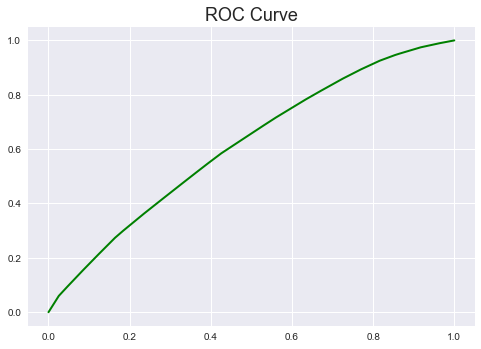

In [59]:
fpr, tpr, _ = metrics.roc_curve(weather.RainTomorrow2, model_roc.predict())

plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.plot(fpr,tpr, 
         color='green',
         linewidth=2, 
         markersize=12)
plt.title("ROC Curve")
plt.show()

### (v) 

#### (2) What is the AUC of this model?

In [60]:
print('This Model has a AUC score of:', metrics.roc_auc_score(weather.RainTomorrow2, model_roc.predict()))

This Model has a AUC score of: 0.6140508792657052


# 2 Linear Regression

## (a) Exploration

### (i) 

#### ${1}$ Fit the model np.log(earnings) ~ age + education + gender. Show the output of the model and interpret each coeﬀicient.

Coefficients we get from this model are male, female, age and education. Our gender female is captured by the intercept term and gender seems to contribute to this model the most and determined our predicted response by a larger percentage than other coefficients. Followed by education are a big covariate that can influence our predicted response. 

- we can see that based on the ranking, gender seems to have the the highest impact on our response and then education lastly age and based on p-values we can say they do reach significant level to reject our Null Hypothesis ${H_0}$ and estiablished this model in use.

In [4]:
data = sm.datasets.get_rdataset("CPSSW8", "AER").data

data.head(5)

,earnings,gender,age,region,education
0,20.673077,male,31,South,14
1,24.278847,male,50,South,12
2,10.149572,male,36,South,12
3,8.894231,female,33,South,10
4,6.410256,female,56,South,10


In [5]:
fit = smf.ols("np.log(earnings) ~ age + education + gender", data = data).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     6649.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:36:28   Log-Likelihood:                -42257.
No. Observations:               61395   AIC:                         8.452e+04
Df Residuals:                   61391   BIC:                         8.456e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9868      0.013     74.296      0.000       0.961       1.013
gender[T.male]     0.2339      0.004     59.651      0.000       0.226       0.242
age                0.0089      0.000     48.215      0.000       0.009       0.009
education          0.0941      0.001    118.818      0.000       0.093       0.096
==============================================================================
Omnibus:                     2743.387   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3647.470
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (i) 

#### ${2}$ Why is there no coeﬀicient for female?

If we change our model to ${"np.log(earnings)}$ ~ ${age + education + gender -1"}$ We can see the excluded model of intercept with provided coefficients for all categories. We can say the coefficient female. The value of our female has been captured by the intercept term.

### (ii) 

#### Fit a model with an interaction term between gender and education. Interpret the coeﬀicient gender[T.male]:education. What is the p-value for this coeﬀicient?

based on our coefficient of gender[T.male]:education = -0.041361:

- one unit increase in our interaction ${gender[T.male]:education}$, our response 𝑛𝑝.𝑙𝑜𝑔(𝑒𝑎𝑟𝑛𝑖𝑛𝑔𝑠) would decrease one unit

- comapred to our previous model, our model elevated in ${R^2}$ by 0.004 but here our p-value is 0.159 (p>0.05). Showing this interaction does not shown significant and cannot provide ability to our explaination for our response.

In [6]:
fit = smf.ols("earnings ~ age + gender * education", data = data).fit()


print('Coefficients:\n', fit.params, '\nP-Values:\n', fit.pvalues,'\nR Squared:', fit.rsquared)

Coefficients:
 Intercept                  -14.623340
gender[T.male]               4.816203
age                          0.157422
education                    1.772641
gender[T.male]:education    -0.041361
dtype: float64 
P-Values:
 Intercept                   0.000000e+00
gender[T.male]              4.700570e-32
age                         0.000000e+00
education                   0.000000e+00
gender[T.male]:education    1.593211e-01
dtype: float64 
R Squared: 0.2487826428974439


### (iii) 

#### ${1}$ Using the model in the previous exercise, predict the wage (not on the log scale!) for:

1. A female with education = 20 and age = 40

27.126359999999995

2. 2. A male with education = 20 and age = 28.

28.895390999999996

In [7]:
model_wage = smf.ols("earnings ~ age + gender * education", data = data).fit()

model_wage.params

Intercept                  -14.623340
gender[T.male]               4.816203
age                          0.157422
education                    1.772641
gender[T.male]:education    -0.041361
dtype: float64

#### wage model:  <br><br> ${earings = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4}$ <br> <br>${earings = \beta_0 + \beta_1X_{gender[T.male]} + \beta_2X_{age} + \beta_3X_{education	} + \beta_4X_{gender[T.male]:education}}$ <br><br>${earings = -14.623340 + 4.816203X_{gender[T.male]} + 0.157422X_{age} + 1.772641X_{education	} - 0.041361X_{gender[T.male]:education}}$

In [8]:
#A female with education = 20 and age = 40: 

- 14.623340 + 0.157422 * 40 + 1.772641 * 20 

27.126359999999995

In [9]:
#A male with education = 20 and age = 28: 

- 14.623340 + 4.816203 + (0.157422 * 28) + (1.772641 * 20) - (0.041361 * ( 1 * 28 ))

28.895390999999996

## (b) Regions

### (i) 

#### What are the unique “regions” in this data set? Make a table containing 95% confidence intervals for the average earnings for each combination of region and gender.

|Region         |     Gender   |     Avg.   |
| :--- | :---  | :----: | 
| Midwest      | female           | 15.863265    |
|       | male           | 19.921252    |
| Northeast      | female          | 17.674641    |
|       | male          |  21.528370    |
| South       | female          | 15.738973    |
|      | male         |  19.254426    |
| West      | female          |  16.500548    |
|       | male         | 20.089989    |

<br>

|         |    Midwest   |   Northeast  | South |    West   |
| :--- | :--- | :---: | :----: | :----: | 
| Male      | (19.710304, 20.132200)         | (21.294135, 21.762605)       | (19.062785, 19.446067)	    | (19.880695, 20.299283)    |
| Female      | (15.624361, 16.102170)       | (17.411674, 17.937607)      | (15.529897, 15.948049)    | (16.255156, 16.745940)	    |

In [10]:
data.region.nunique()

4

In [11]:
data.groupby(["region", "gender"])["earnings"].mean()
#we can find the average earings here

region     gender
Midwest    female    15.863265
           male      19.921252
Northeast  female    17.674641
           male      21.528370
South      female    15.738973
           male      19.254426
West       female    16.500548
           male      20.089989
Name: earnings, dtype: float64

In [12]:
region_gender = set(product(set(data["region"]), set(data["gender"])))
#first we create our cartesian product

data["region_gender"] = list(zip(data["region"],data["gender"])) 
#fit this into my dataframe

fit_2 = smf.ols('earnings ~ region_gender - 1', data = data).fit()
#now we can run the regression with our cartesian product

In [13]:
records = sorted(list(product(set(data["region"]), set(data["gender"]))))

frame = pd.DataFrame.from_records(records, columns = ["region", "gender"])

table_2 = fit_2.conf_int()

table_2.reindex(table_2.abs().index).reset_index()

table_2.columns = ["Conf_0.025", "Conf_0.975"]

Avergae = [15.863265, 19.921252,17.674641, 21.528370, 15.738973, 19.254426, 16.500548, 20.089989]

table_2["Avg."] = Avergae

table_2

,Conf_0.025,Conf_0.975,Avg.
"region_gender[('Midwest', 'female')]",15.624361,16.102170,15.863265
"region_gender[('Midwest', 'male')]",19.710304,20.132200,19.921252
"region_gender[('Northeast', 'female')]",17.411674,17.937607,17.674641
"region_gender[('Northeast', 'male')]",21.294135,21.762605,21.528370
"region_gender[('South', 'female')]",15.529897,15.948049,15.738973
"region_gender[('South', 'male')]",19.062785,19.446067,19.254426
"region_gender[('West', 'female')]",16.255156,16.745940,16.500548
"region_gender[('West', 'male')]",19.880695,20.299283,20.089989


### (ii) 

#### ${1}$ Add the “region” term to the model np.log(wage) ~ age + education + gender. 

#### Which region is the reference class in this model?

The Reference Classs Baseline in this model with Region is region[T.Midwest]	

#### ${2}$ Is the region covariate significant?

Region catagory in our regression model here reached significant level since our p-values are all p < 0.05 and we can here reject our ${H_0}$ Null Hypothesis and region covariate can bring significance for our model response.

#### ${3}$ Which region has the worst effect on wages?

Baed on our result, region[T.South]	with coefficient -0.0174 has the worst effect on our earnings since every unit up from Region South, it decrease our earnings unit.

In [14]:
mymodel = smf.ols('np.log(earnings) ~ age + education + gender + region', data = data).fit()

mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3371.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:36:43   Log-Likelihood:                -42152.
No. Observations:               61395   AIC:                         8.432e+04
Df Residuals:                   61388   BIC:                         8.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9831      0.014     71.392      0.000       0.956       1.010
gender[T.male]          0.2329      0.004     59.489      0.000       0.225       0.241
region[T.Northeast]     0.0585      0.006     10.033      0.000       0.047       0.070
region[T.South]        -0.0174      0.005     -3.308      0.001      -0.028      -0.007
region[T.West]          0.0281      0.006      5.066      0.000       0.017       0.039
age                     0.0088      0.000     48.005      0.000       0.008       0.009
education               0.0936      0.001    118.091      0.000       0.092       0.095
==============================================================================
Omnibus:                     2784.532   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.689
Skew:                          -0.456   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (iii) 

#### ${1}$  Add the interaction term region * education to the previous model.

#### Interpret the coeﬀicients of this model.
We can see the interaction of region*education overall brought down accuracy of the model. P-value ${region[T.Northeast],region[T.West],region[T.Northeast]:education}$ all remain unrejectable for our Null Hypothesis and does not bring statistical value. Especially our ${region[T.West]:education}$ reached to almost ${p-value \, 1}$ Hence, to intepret our coefficients of this model, they instead does not bring accuracy but more complicated prediction for our earnings. However, as we predicted before, Gender and Education itself, remians the main two covariates for helping us predict the model with highest coefficients.


#### ${2}$ Explain what region[T.South]:education means using one sentence.
Our assumption here is people from south region and have a certain education education together, they are somehow linked and can bring better prediction to our model together with higher or lower earings.

#### ${3}$ Test if region * education is significant.
Based on P-Values of ${Regions*Education}$ we can conclude that this interaction do not bring statistical evaulation for this model. With P-value to almost 0.973 and 0.522. We thus cannot reject our Null Hypothese that there is no significant between our covariate and response in this model.

In [16]:
mymodel_2 = smf.ols('np.log(earnings) ~ age + gender + education * region', data = data).fit()

mymodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2249.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:39:02   Log-Likelihood:                -42146.
No. Observations:               61395   AIC:                         8.431e+04
Df Residuals:                   61385   BIC:                         8.440e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.0134      0.025     40.380      0.000       0.964       1.063
gender[T.male]                    0.2330      0.004     59.502      0.000       0.225       0.241
region[T.Northeast]               0.0371      0.034      1.080      0.280      -0.030       0.104
region[T.South]                  -0.0997      0.031     -3.249      0.001      -0.160      -0.040
region[T.West]                    0.0286      0.032      0.897      0.370      -0.034       0.091
age                               0.0088      0.000     48.032      0.000       0.008       0.009
education                         0.0914      0.002     53.271      0.000       0.088       0.095
education:region[T.Northeast]     0.0016      0.002      0.640      0.522      -0.003       0.006
education:region[T.South]         0.0061      0.002      2.736      0.006       0.002       0.010
education:region[T.West]      -7.702e-05      0.002     -0.033      0.973      -0.005       0.004
==============================================================================
Omnibus:                     2789.684   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3732.981
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.791   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (iv) 

#### Still using the previous model.

#### ${1}$  Predict the wages of a female of age 40 living the in the south with 0 education. Will your predicted wages increase or decrease if you change the region to Northeast?
we are looking for wages of a female of age 40 living the in the south with 0 education:

with the model 'np.log(earnings) ~ age + education + gender + region' we get a prediction of wage of 3.73801 where we use the log predicted value the take using ${e}$ number to counter our changes to the earnings covariate.

If we change from 𝑟𝑒𝑔𝑖𝑜𝑛[𝑇.𝑆𝑜𝑢𝑡ℎ] to 𝑟𝑒𝑔𝑖𝑜𝑛[𝑇.𝑁𝑜𝑟𝑡ℎ𝑒𝑎𝑠𝑡], we will see our predicted wages increases since our coefficient are higher and education remain the same, where 3.73801 increased to 4.032573.

#### ${2}$  Do you think it is best to use the model with the interaction term region * education or the model without the interaction term? Justify your choice.
It is a better choice to do our prediction without the interaction model since as in previous question we have examined the p-values of the model and majority of them did not reach significant level in order to provide statistical value. It can give us a much more inaccurate (not as close as) predicted earnings comparing to the model without. Even though as shown below our predicted values of the asked informated above is relatively similar with With interaction model prediction of South is predicted of 3.549414 and with interaction model prediction of Northeast is 4.069684. 

#### ${3}$  Suppose you learn that Robin is 35 and resides in the south. Can you use the model in (iii) to predict his / her wage? Why or why not?
We will not be able to use the model in (iii) to prodict Robin's earnings due to two reasons:

- The model itself is not really statiscially significant.

- With the interaction, we need to know Robin's education variables to using this model to predict.

- Based on the question titled 'his/her', we are also unsure of Robin's gender which we will have two imporant variables required to proceed the prediction. 

In [32]:
mymodel_2_nolog = smf.ols('np.log(earnings) ~ age + gender + region * education', data = data).fit()

mymodel_2_nolog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2249.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:45:40   Log-Likelihood:                -42146.
No. Observations:               61395   AIC:                         8.431e+04
Df Residuals:                   61385   BIC:                         8.440e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.0134      0.025     40.380      0.000       0.964       1.063
gender[T.male]                    0.2330      0.004     59.502      0.000       0.225       0.241
region[T.Northeast]               0.0371      0.034      1.080      0.280      -0.030       0.104
region[T.South]                  -0.0997      0.031     -3.249      0.001      -0.160      -0.040
region[T.West]                    0.0286      0.032      0.897      0.370      -0.034       0.091
age                               0.0088      0.000     48.032      0.000       0.008       0.009
education                         0.0914      0.002     53.271      0.000       0.088       0.095
region[T.Northeast]:education     0.0016      0.002      0.640      0.522      -0.003       0.006
region[T.South]:education         0.0061      0.002      2.736      0.006       0.002       0.010
region[T.West]:education      -7.702e-05      0.002     -0.033      0.973      -0.005       0.004
==============================================================================
Omnibus:                     2789.684   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3732.981
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.791   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
mymodel_3 = smf.ols('np.log(earnings) ~ age + education + gender + region', data = data).fit()

mymodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3371.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:42:25   Log-Likelihood:                -42152.
No. Observations:               61395   AIC:                         8.432e+04
Df Residuals:                   61388   BIC:                         8.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9831      0.014     71.392      0.000       0.956       1.010
gender[T.male]          0.2329      0.004     59.489      0.000       0.225       0.241
region[T.Northeast]     0.0585      0.006     10.033      0.000       0.047       0.070
region[T.South]        -0.0174      0.005     -3.308      0.001      -0.028      -0.007
region[T.West]          0.0281      0.006      5.066      0.000       0.017       0.039
age                     0.0088      0.000     48.005      0.000       0.008       0.009
education               0.0936      0.001    118.091      0.000       0.092       0.095
==============================================================================
Omnibus:                     2784.532   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.689
Skew:                          -0.456   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x = mymodel_3.predict({"age": 40, 
                                "education": 0, 
                                "region": "South", 
                                "gender":"female"})
x_2 = mymodel_3.predict(({"age": 40, 
                                "education": 0, 
                                "region": "Northeast", 
                                "gender":"female"}))

print('Without interaction model prediction of South: ', np.exp(x))
print('Without interaction model prediction of Northeast: ', np.exp(x_2)) 

Without interaction model prediction of South:  0    3.73801
dtype: float64
Without interaction model prediction of Northeast:  0    4.032573
dtype: float64


In [45]:
x_3 = mymodel_2_nolog.predict({"age": 40, 
                                "education": 0, 
                                "region": "South", 
                                "gender":"female"})
x_4 = mymodel_2_nolog.predict(({"age": 40, 
                                "education": 0, 
                                "region": "Northeast", 
                                "gender":"female"}))

print('With interaction model prediction of South: ', np.exp(x_3))
print('With interaction model prediction of Northeast: ', np.exp(x_4)) 

With interaction model prediction of South:  0    3.549414
dtype: float64
With interaction model prediction of Northeast:  0    4.069684
dtype: float64


## (c) Model Fit and Model Choice

### (i) 

#### ${1}$ We’re using "np.log(wages) ~ age + education * gender" in this subexercise. Plot the distribution of the residuals using a QQ plot and a histogram. Are the residuals normal? If not, do they deviate from normality in a way we expect to have serious implications for inference?

- Based on our plot, the residual is almost at a normal distribution. The historgram has shown this perfectly. With our mean (E[X]) on almost 0.<br><br>
- We can use our QQPlot further investigate this and also our P-values. 
<br><br>
- The QQPlot shows and corrosponds to our historgram as residuals are almost aligned with our 45' examine line and thus are almost normally distributed. 
<br><br>
- The left bottom has very few scattered dots. These dots should be ones with low significance, meaning no strong correlation to our model. This QQPlot in total displays that this model is reasonable.

#### ${2}$ Make a residual plot, residuals versus fitted. Make some comment on its looks!
One of our assumptions under a regression model including homoscedasticity for our variables. After the QQPlot and Histrogram we can be more sure that since our Residuals shows a normal distribution Combined with our Residuals vs Fitted plot, we can say that this model shows a good distribution. There are some a little heteroscedasticity that can be observed as our fitted values overall can draw a tilted line yet overall this model is workable and are evaluated.

In [50]:
c_model = smf.ols('np.log(earnings) ~ age + education * gender', data = data).fit()

# model values
model_fitted_y = c_model.fittedvalues
# model residuals
model_residuals = c_model.resid

Text(0, 0.5, 'Standardized Residuals')

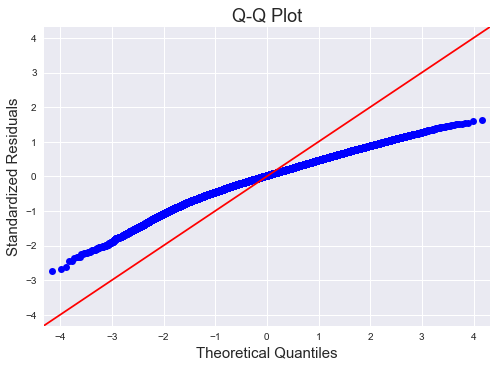

In [47]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

plot_lm_2 = sm.qqplot(model_residuals, line='45', color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Q-Q Plot')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

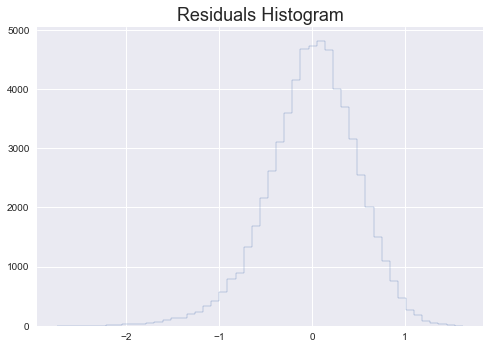

In [48]:
plt.hist(model_residuals, 50, histtype = 'step')
plt.title('Residuals Histogram')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


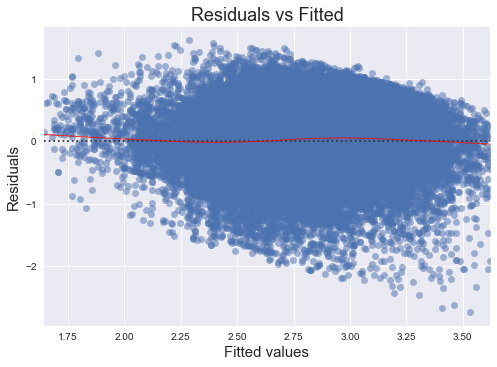

In [49]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

### (ii)  & (iii) 

1. You need to make a good predictive model for the log wages. Try out at least five models and make an informed choice between them. Be sure to justify your choice, and be sure to try out at least one transformation of the covariates!<br>
<br>
2. Report the 𝑅2s of the models from (ii) in a table.


Education and earnings obviously has high correlation, I will use this in my regresion first. I also think there is a relationship between gender and education level that can help me predict earnings:

In [80]:
s_model_1 = smf.ols('np.log(earnings) ~ I(education ** 2) * gender', data = data).fit()

s_model_1.aic

86921.53884292742

after model_01 here is what we have:

|Models         | adj.R${^2}$       | AIC    | ${\Delta}$adj.R${^2}$ | ${\Delta}$AIC |
| :------------- |:-------------:| :------:| :-------------:| -------------:|
| Model_01      | 0.215       | 86921.5|           NULL|           NULL|


So far, after our transformation to our covariate education, and interact with gender, the model itself can already fit our prediction by 21.5%. Let's try to aim for a higher model.


In [81]:
s_model_2 = smf.ols('np.log(earnings) ~ I(education ** 2) * gender * age + region', data = data).fit()

s_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2026.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:                -42138.
No. Observations:               61395   AIC:                         8.430e+04
Df Residuals:                   61384   BIC:                         8.440e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.5270      0.038     40.054      0.000       1.452       1.602
gender[T.male]                           0.0407      0.049      0.838      0.402      -0.054       0.136
region[T.Northeast]                      0.0552      0.006      9.472      0.000       0.044       0.067
region[T.South]                         -0.0209      0.005     -3.993      0.000      -0.031      -0.011
region[T.West]                           0.0249      0.006      4.485      0.000       0.014       0.036
I(education ** 2)                        0.0042      0.000     22.299      0.000       0.004       0.005
I(education ** 2):gender[T.male]         0.0004      0.000      1.800      0.072    -3.9e-05       0.001
age                                      0.0093      0.001     10.708      0.000       0.008       0.011
gender[T.male]:age                       0.0077      0.001      6.874      0.000       0.005       0.010
I(education ** 2):age                -1.106e-05    4.3e-06     -2.574      0.010   -1.95e-05   -2.64e-06
I(education ** 2):gender[T.male]:age -2.641e-05   5.57e-06     -4.739      0.000   -3.73e-05   -1.55e-05
==============================================================================
Omnibus:                     2750.767   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3678.963
Skew:                          -0.452   Prob(JB):                         0.00
Kurtosis:                       3.787   Cond. No.                     3.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after model_02 here is what we have:

|Models         | adj.R${^2}$       | AIC    | ${\Delta}$adj.R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.215       | 86921.5|           NULL|           NULL|
| Model_02      | 0.248       | 84297.2|    +0.033   |      -2624.3|

This model shows a surprising result. The categoricial covariate gender[Male] actually cannot reject Null Hypothesis and present a quite high p-value. The model itself, however, shows a good 24.8% Adjusted ${R^2}$. 

Now let's try some adjustment on our age covariate.

In [82]:
s_model_3 = smf.ols('np.log(earnings) ~ gender + np.log(age) + I(education ** 2)', data = data).fit()

s_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     6760.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:                -42132.
No. Observations:               61395   AIC:                         8.427e+04
Df Residuals:                   61391   BIC:                         8.431e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6040      0.027     22.538      0.000       0.551       0.657
gender[T.male]        0.2304      0.004     58.904      0.000       0.223       0.238
np.log(age)           0.3791      0.007     52.869      0.000       0.365       0.393
I(education ** 2)     0.0033   2.84e-05    117.049      0.000       0.003       0.003
==============================================================================
Omnibus:                     2777.940   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3731.516
Skew:                          -0.454   Prob(JB):                         0.00
Kurtosis:                       3.797   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after model_03 here is what we have:

|Models         | adj.R${^2}$       | AIC    | ${\Delta}$adj.R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.215       | 86921.5|           NULL|           NULL|
| Model_02      | 0.248       | 84297.2|    +0.033   |      -2624.3|
| Model_03      | 0.248       | 84271.4|    +0.000   |        +3.2|

This model is relativly present the same result compared to our Model 2 and it gives a cleaner and more concise covairates. All p-values pass our ${H_0}$ and thus is quite a progress than our previous model. 

But I am sure there are higher model for this prediction. Let's try some alterations.

In [83]:
s_model_4 = smf.ols('np.log(earnings) ~ np.log(age) + gender + education + I(education ** 2)', data = data).fit()

s_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     5168.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:                -41985.
No. Observations:               61395   AIC:                         8.398e+04
Df Residuals:                   61390   BIC:                         8.403e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0771      0.048     -1.610      0.107      -0.171       0.017
gender[T.male]        0.2341      0.004     59.897      0.000       0.226       0.242
np.log(age)           0.3847      0.007     53.723      0.000       0.371       0.399
education             0.0965      0.006     17.150      0.000       0.086       0.108
I(education ** 2)    -0.0001      0.000     -0.536      0.592      -0.001       0.000
==============================================================================
Omnibus:                     2804.438   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3756.544
Skew:                          -0.458   Prob(JB):                         0.00
Kurtosis:                       3.794   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after model_04 here is what we have:

|Models         | adj.R${^2}$       | AIC    | ${\Delta}$adj.R${^2}$ | ${\Delta}$AIC |
| :------------- |:-------------:| :------:| -------------:| -------------:|
| Model_01      | 0.215       | 86921.5|           NULL|           NULL|
| Model_02      | 0.248       | 84297.2|    +0.033   |      -2624.3|
| Model_03      | 0.248       | 84271.4|    +0.000   |        +3.2|
| Model_04      | 0.252       | 83980.0|    +0.004   |       -291.4  |

We have made some adjustment but here by evaulating the p-values, I can see our baseline and adjusted Education seems to not be uaccurate anymore. 

In [84]:
s_model_5 = smf.ols('''np.log(earnings) ~ I(1 * (region == 'South')) + gender * age * education + np.log(age)''', data = data).fit()


s_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2519.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:                -41244.
No. Observations:               61395   AIC:                         8.251e+04
Df Residuals:                   61385   BIC:                         8.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.4724      0.147    -30.339      0.000      -4.761      -4.183
gender[T.male]                   0.2921      0.092      3.189      0.001       0.113       0.472
I(1 * (region == 'South'))      -0.0443      0.004    -10.697      0.000      -0.052      -0.036
age                             -0.0439      0.002    -20.708      0.000      -0.048      -0.040
gender[T.male]:age               0.0053      0.002      2.537      0.011       0.001       0.009
education                        0.1051      0.005     20.186      0.000       0.095       0.115
gender[T.male]:education        -0.0127      0.007     -1.909      0.056      -0.026       0.000
age:education                -2.853e-05      0.000     -0.239      0.811      -0.000       0.000
gender[T.male]:age:education    -0.0002      0.000     -1.230      0.219      -0.000       0.000
np.log(age)                      2.0404      0.050     40.842      0.000       1.942       2.138
==============================================================================
Omnibus:                     2827.060   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3826.092
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.813   Cond. No.                     5.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In total, with model_05 here is what we have:

|Models         | adj.R${^2}$       | AIC    | ${\Delta}$adj.R${^2}$ | ${\Delta}$AIC |
| ------------- |:-------------:| ------:| -------------:| -------------:|
| Model_01      | 0.215       | 86921.5|           NULL|           NULL|
| Model_02      | 0.248       | 84297.2|    +0.033   |      -2624.3|
| Model_03      | 0.248       | 84271.4|    +0.000   |        +3.2|
| Model_04      | 0.252       | 83980.0|    +0.004   |       -291.4  |
| Model_05      | 0.270       | 82507.5|    +0.018    |       -1472.5  |


 So far these are our five models. I am inclined to choosing our last model Mode_05 but let's do some examination on it and see if it is a suitable evaulated model since some of our covariates does not pass the pvalue Significant test.
 
Firstly we can examine the ANOVA table here for model 2 and 5 (ones choosing between): lastly I decided to use model 5 as it present the highest ${R^2}$ score and lowest AIC. Beaware of that interaction does not really bring statistical value to our model, but, we can say that it is because of the interacted covariate itself, the model predicted level increansed to 27% from 21.5%. Based on the QQ Plot we can also see the distribution is close to the 45 degrees exmaine line and perform a good normal distributed residuals. 

In [85]:
anova_lm(s_model_5)

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,646.280571,646.280571,2879.560672,0.000000e+00
I(1 * (region == 'South')),1.0,59.365886,59.365886,264.509996,2.375770e-59
age,1.0,703.883770,703.883770,3136.216859,0.000000e+00
gender:age,1.0,41.426071,41.426071,184.577549,5.582281e-42
education,1.0,3212.860087,3212.860087,14315.184407,0.000000e+00
gender:education,1.0,37.427597,37.427597,166.761992,4.227707e-38
age:education,1.0,10.848086,10.848086,48.334612,3.629282e-12
gender:age:education,1.0,2.384578,2.384578,10.624698,1.116479e-03
np.log(age),1.0,374.378697,374.378697,1668.077645,0.000000e+00
Residual,61385.0,13777.078299,0.224437,NaN,NaN


In [86]:
anova_lm(s_model_2)

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,646.280571,646.280571,2796.877525,0.000000e+00
region,3.0,113.489138,37.829713,163.713839,1.049718e-105
I(education ** 2),1.0,3333.902396,3333.902396,14427.969988,0.000000e+00
I(education ** 2):gender,1.0,19.847254,19.847254,85.892012,1.959621e-20
age,1.0,527.151584,527.151584,2281.328705,0.000000e+00
gender:age,1.0,13.922043,13.922043,60.249759,8.483796e-15
I(education ** 2):age,1.0,22.017661,22.017661,95.284778,1.712123e-22
I(education ** 2):gender:age,1.0,5.188648,5.188648,22.454663,2.156435e-06
Residual,61384.0,14184.134347,0.231072,NaN,NaN


Text(0, 0.5, 'Standardized Residuals')

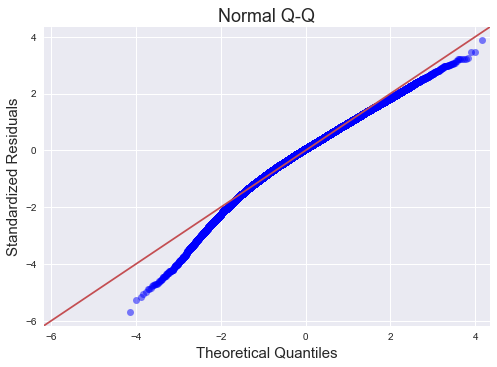

In [134]:
# model values
model_fitted_y = s_model_5.fittedvalues
# model residuals
model_residuals = s_model_5.resid
# normalized residuals
model_norm_residuals = s_model_5.get_influence().resid_studentized_internal
# absolute squared normalized residuals

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

plot_lm_2 = sm.qqplot(model_norm_residuals, line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# 3 Simulation

## (a) Implementing the Funcation

### (i) 

#### Implement the sample skewness as the function skewness taking x as an argument. Run the function on the vector np.array([7,0.3,1,33,0,6]).

In [53]:
def skewnesss(x):
    
    n = len(x) #sample total n
    
    x_bar = sum(x)/n #sample mean
    
    sigma_s_upper = [] #skewness upper sigma part
    
    sigma_s_lower = [] #skewness lower sigma part
    
    sigma_k_upper = []
    
    sigma_k_lower = []
    
    for i in x:
        
        sigma_s_upper.append((i - x_bar)**3)
    
    for i in x:
        
        sigma_s_lower.append((i - x_bar)**2)      
            
    for i in x:
        
        sigma_k_upper.append((i - x_bar)**4)
        
    for i in x:
        
        sigma_k_lower.append((i - x_bar)**2)
        
    skewness = ((sum(sigma_s_upper) / n) / ((sum(sigma_s_lower) / n ) ** (3/2)))
    
    kurtosis = ((sum(sigma_k_upper) / n) / ((sum(sigma_k_lower) / n ) ** (2)))
   
    print('Skewness =', skewness)

In [54]:
x = np.array([7,0.3,1,33,0,6])

skewnesss(x)

Skewness = 1.5723844222148309


### (ii) 

#### Now implement the sample kurtosis as the function kurtosis taking a Numpy array x as an argument. Run the function on the vector np.array([2,1,0.5,1,2,5]). (Please implement your own function, even if Numpy or Scipy might have it implemented already.)

In [55]:
def kurtosiss(x):
    
    n = len(x) #sample total n
    
    x_bar = sum(x)/n #sample mean
    
    sigma_s_upper = [] #skewness upper sigma part
    
    sigma_s_lower = [] #skewness lower sigma part
    
    sigma_k_upper = []
    
    sigma_k_lower = []
    
    for i in x:
        
        sigma_s_upper.append((i - x_bar)**3)
    
    for i in x:
        
        sigma_s_lower.append((i - x_bar)**2)      
            
    for i in x:
        
        sigma_k_upper.append((i - x_bar)**4)
        
    for i in x:
        
        sigma_k_lower.append((i - x_bar)**2)
        
    skewness = ((sum(sigma_s_upper) / n) / ((sum(sigma_s_lower) / n ) ** (3/2)))
    
    kurtosis = ((sum(sigma_k_upper) / n) / ((sum(sigma_k_lower) / n ) ** (2)))
   
    print('Kurtosis =', kurtosis)

In [56]:
y = np.array([2,1,0.5,1,2,5])

kurtosiss(y)

Kurtosis = 3.295495029306689


### (iii) 

#### Make the jarque_beta function, taking x as an argument, that implements the Jarque-Bera test. To do this, use that the definition of the Jarque-Bera test is 𝑛6 (𝑆2 + 14 (𝐾 − 3)2), where 𝑛 is the sample size 𝑆 is the sample skewness, and 𝐾 is the sample kurtosis.


In [57]:
def jarque_beta(x):
    
    n = len(x) #sample total n
    
    x_bar = sum(x)/n #sample mean
    
    sigma_s_upper = [] #skewness upper sigma part
    
    sigma_s_lower = [] #skewness lower sigma part
    
    sigma_k_upper = []
    
    sigma_k_lower = []
    
    for i in x:
        
        sigma_s_upper.append((i - x_bar)**3)
    
    for i in x :
        
        sigma_s_lower.append((i - x_bar)**2)      
            
    for i in x:
        
        sigma_k_upper.append((i - x_bar)**4)
        
    for i in x :
        
        sigma_k_lower.append((i - x_bar)**2)
        
    
    skewness = ((sum(sigma_s_upper) / n) / ((sum(sigma_s_lower) / n ) ** (3/2)))
    
    kurtosis = ((sum(sigma_k_upper) / n) / ((sum(sigma_k_lower) / n ) ** (2)))
    
    jb_test = ( n / 6 ) * ((( skewness ) ** 2 ) + (( 1 / 4 ) * (( kurtosis - 3 ) ** 2 )))
    
    
    return(jb_test)

In [58]:
print('Jarque-Bera Test =', jarque_beta(x))

Jarque-Bera Test = 2.6317260545008505


In [59]:
c = np.array([7,0.3,1,33,0,6])

jarque_beta(c)

2.6317260545008505

## (b) Simulations

### (i) 

#### Make a function that simulates n observations from a normal distribution with mean mu and standard deviation sigma then calculates the Jarque-Beta test on these values. Do this n_reps times, and return the resulting test values as a Numpy vector. (Use the signature jarque_bera_normal(n, mu, sigma, n_reps)).


In [60]:
def jarque_bera_normal(n, mu, sigma, n_reps):
    
    rng = np.random.normal(mu, sigma, size = (n, n_reps))
    
    ans = np.array(jarque_beta(rng))
    
    return(ans)

jarque_bera_normal(100, 0, 1, 10**5)

array([ 1.42621116, 33.09868414,  0.4891973 , ...,  1.59863464,
        1.36511308,  1.90636243])

### (ii) 

#### Using n = 100 and n_reps = 10**5, call jarque_bera_normal with your choice of mu and sigma. Make a histogram of the values. Moreover, according to Jarque-Bera test, the distribu- tion of the Jarque-Bera test should be approximately 𝜒2-distributed with 2 degrees of freedom. To verify this, add a line plot of the 𝜒2-distributed with 2 degrees of freedom to the histogram. Comment how well the lines match. (Hint: To plot the 𝜒2-distribution you must consult the Numpy documentation.)

Here we can see our plotted Jarque Bera Function array shows a 𝜒2-distributed curve with a sample of 5000. 

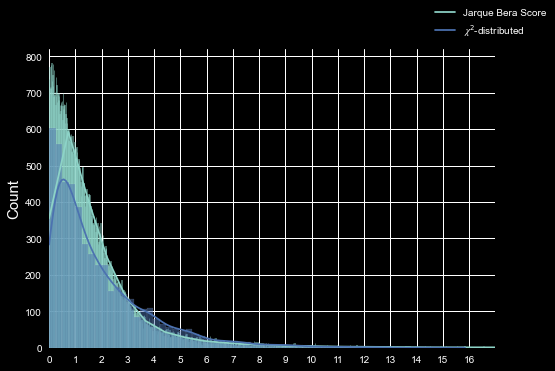

In [66]:
x = jarque_bera_normal(100, 15, 3, 10**5)
x_2 = np.random.chisquare(df = 2, size = 5000)

plt.style.use('dark_background')
fig, ax = plt.subplots()
sns.histplot(x, ax = ax, bins=10**4, kde=True, fill = False, palette="Set2")
sns.histplot(x_2, kde = True)
ax.set_xlim(0,17)
ax.set_xticks(range(0,17))
fig.legend(labels=['Jarque Bera Score','${𝜒^2}$-distributed'])
plt.show()

### (iii)

Since the Jarque-Bera test is 𝜒2-distributed with 2 degrees of freedom, we can calculate its p-value using scipy.stats.chi2. Explain how you would do this and why the result is a p-value.


##### Before we start our Hypothesis, we need to examine what p-value is.

- p-value is the probability of obtaining test result at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

- Here we are talking about If the distribution is Normal Distribution ${\rightarrow}$ ${p(x)\,{\geq}\,t}$

Our Jarque-Bera test can thus prove:
 
##### If ${X_i}$ is has a distribution of ${\,N(μ，σ^2)}$, the when our sample ${n\,{\geq}\,30}$, our ${JB\,}$~${\,χ^2_{df = 2}}$

Now we construct our Hypothesis as instructed:

$\left\{\begin{matrix}
H_0 = The\,\,true\,\,distribution\,\,is\,\,normal\\H_1 = The\,\,true\,\,distribution\,\,is\,\,not\,\,normal
\end{matrix}\right.$

##### If ${JB\,}$${>}$${\,χ^2_{df = 2}}$ then it rejects our ${H_0}$ meaning that our covariate is not normally distributed.

##### Question: how you would do this and why the result is a p-value.

1. From our function, we have calculated our JB values. Afterwards, we can use our sample from the function (using the same array that was calculating the JB Score)

    rng = np.random.normal(mu, sigma, size = (n, n_reps))

    Now further using scipy.stats.chi2 with confidence interval ${\alpha = 0.05}$ and we have two arrays for each 10**5 reps of experiment and their JB values and p-values. 

    We now just need to compare each of their ${\chi^2_{\alpha = 0.05, df = 2}}$ to our ${JB}$ scores and we can see if<br>${JB\,}$${< }$${\,χ^2_{df = 2}}$ then our value fail to reject ${H_0}$<br>
<br>
2. We can simply use 1 - stats.chi2.cdf() to get our p-value. Cumulative Distribution Function presents the cumulative probability of a function up to a whole given area. Our goal is here to see what is the cumulatived ones that on one side of this point whic his why teh given result is a p-value.

## (c) Power of Functions

### (i)  

#### Make a function simulate_jarque_bera that takes three arguments n, n_reps and random as arguments. The random argument should be a random generator taking one size argument. (E.g. lambda size: rng.normal(mu, sigma, size), lambda size: rng.exponential(lambda, size)). It should simulate the Jarque-Bera test as we did in (b), but with the supplied distribution random instead of the normal distribution.


In [194]:
normal = lambda mu, sigma, sizes: np.random.normal(mu,sigma, size = (sizes))
logit = lambda sizes: np.random.logistic(size = (sizes))
gamma = lambda s, sizes: np.random.gamma(s, size = (sizes))
exponential = lambda s, sizes: np.random.exponential(s, size = (sizes))
lognormal = lambda sizes: np.random.lognormal(size = (sizes))
poisson = lambda sizes: np.random.poisson(size = (sizes))
uniform = lambda sizes: np.random.uniform(size = (sizes))
chisquare = lambda df, sizes: np.random.chisquare(df, size = (sizes))
geometric = lambda p, sizes: np.random.geometric(p,size = (sizes))
standard_cauchy = lambda sizes: np.random.standard_cauchy(size = (sizes))
laplace = lambda mu,scale,sizes: np.random.laplace(mu,scale,size = (sizes))
    
def rando(distribution):
    
    normal = lambda mu, sigma, sizes: np.random.normal(mu,sigma, size = (sizes))
    logit = lambda sizes: np.random.logistic(size = (sizes))
    gamma = lambda s, sizes: np.random.gamma(s, size = (sizes))
    exponential = lambda s, sizes: np.random.exponential(s, size = (sizes))
    lognormal = lambda sizes: np.random.lognormal(size = (sizes))
    poisson = lambda sizes: np.random.poisson(size = (sizes))
    uniform = lambda sizes: np.random.uniform(size = (sizes))
    chisquare = lambda df, sizes: np.random.chisquare(df, size = (sizes))
    geometric = lambda p, sizes: np.random.geometric(p,size = (sizes))
    standard_cauchy = lambda sizes: np.random.standard_cauchy(size = (sizes))
    laplace = lambda mu,scale,sizes: np.random.laplace(mu,scale,size = (sizes))
    
    return(distribution)

In [195]:
def simulate_jarque_bera(n, n_reps,random):
    
    x = rando(random)
    
    x_jb_sample = np.array(jarque_beta(x))
    
    return(x_jb_sample)

In [196]:
simulate_jarque_bera(5,10**5,logit((10,10**5)))

array([0.74722169, 0.38017125, 1.08096005, ..., 0.8768789 , 1.61170498,
       1.31701453])

In [197]:
simulate_jarque_bera(5,10**5,normal(0,1,(10,10**5)))

array([0.56658616, 0.52684691, 0.91705176, ..., 0.10249743, 0.61832134,
       3.35967844])

### (ii) 

#### Make a function power_jarque_bera(n, n_reps, random, alpha = 0.05). The first three arguments are the same as the previous exercise, and alpha is a significance level. It should return the approximate probability that the Jarque-Bera test will be significant at the alpha level when the true distribution is random.

In [198]:
def power_jarque_bera(n, n_reps, random, alpha = 0.05):
    
    x_sample = np.array(rando(random))
    
    x_test = np.array(1 - stats.chi2.cdf(x_sample, 2,))  
    
    return(np.mean(x_test <= alpha))

In [199]:
power_jarque_bera(10, 10**5, poisson((10,10**5)), alpha = 0.05)

0.000546

### (iii) 

#### Use the power_jarque_bera(n, n_reps, random, alpha = 0.05) function to calculate the power of the Jarque-Bera test for 5 different choices of distributions (the random argument) and put them into a table with 𝑛 = 50,100,1000. One of these five distributions should be the Laplace distribution.

laplace:

In [162]:
power_jarque_bera(50, 10**5, laplace(0,1,(50,10**5)), alpha = 0.05)

0.001259

In [163]:
power_jarque_bera(100, 10**5, laplace(0,1,(100,10**5)), alpha = 0.05)

0.0012399

In [164]:
power_jarque_bera(1000, 10**5, laplace(0,1,(1000,10**5)), alpha = 0.05)

0.00125067

logit:

In [165]:
power_jarque_bera(50, 10**5, logit((50,10**5)), alpha = 0.05)

0.0024864

In [166]:
power_jarque_bera(100, 10**5, logit((100,10**5)), alpha = 0.05)

0.0025001

In [167]:
power_jarque_bera(1000, 10**5, logit((1000,10**5)), alpha = 0.05)

0.00248672

exponential:

In [168]:
power_jarque_bera(50, 10**5, exponential(1,(50,10**5)), alpha = 0.05)

0.0025126

In [169]:
power_jarque_bera(100, 10**5, exponential(1,(100,10**5)), alpha = 0.05)

0.0025224

In [170]:
power_jarque_bera(1000, 10**5, exponential(1,(1000,10**5)), alpha = 0.05)

0.00250187

poisson:

In [171]:
power_jarque_bera(50, 10**5, poisson((50,10**5)), alpha = 0.05)

0.0005892

In [172]:
power_jarque_bera(100, 10**5, poisson((100,10**5)), alpha = 0.05)

0.0005976

In [173]:
power_jarque_bera(1000, 10**5, poisson((1000,10**5)), alpha = 0.05)

0.00059337

gamma:

In [174]:
power_jarque_bera(50, 10**5, gamma(1,(50,10**5)), alpha = 0.05)

0.002512

In [175]:
power_jarque_bera(100, 10**5, gamma(1,(100,10**5)), alpha = 0.05)

0.0025129

In [176]:
power_jarque_bera(1000, 10**5, gamma(1,(1000,10**5)), alpha = 0.05)

0.002501